In [ ]:
# 독립 변수
'''
species : 펭귄의 종을 나타내는 문자열
island : 샘플들이 수집된 Palmer Station 근처 섬 이름
Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
Flipper Length (mm) : 펭귄의 팔(날개) 길이
'''
# 종속 변수
'''
Body Mass : 펭귄의 몸무게를 나타내는 숫자 (g)
'''

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
# CSV 파일 경로 설정
file_path = "penguins_size_filled.csv"

# CSV 파일을 pandas DataFrame으로 읽기
df = pd.read_csv(file_path)

print(df.head(10))

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen              43.9             17.2              200.9   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   
6  Adelie  Torgersen              38.9             17.8              181.0   
7  Adelie  Torgersen              39.2             19.6              195.0   
8  Adelie  Torgersen              34.1             18.1              193.0   
9  Adelie  Torgersen              42.0             20.2              190.0   

   body_mass_g     sex  island_Biscoe  island_Dream  island_Torgersen  ...  \
0       3750.0    MALE              0             0            

In [14]:
# 데이터 준비

pg_input = df[['culmen_length_mm','flipper_length_mm']].to_numpy()
#pg_input = df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','island_Biscoe','island_Dream','island_Torgersen','species_Adelie','species_Chinstrap','species_Gentoo','sex_FEMALE','sex_MALE']].to_numpy()
pg_input[:5]

array([[ 39.1, 181. ],
       [ 39.5, 186. ],
       [ 40.3, 195. ],
       [ 43.9, 200.9],
       [ 36.7, 193. ]])

In [15]:
pg_target = df['body_mass_g'].to_numpy()
pg_target[:5]

array([3750., 3800., 3250., 4202., 3450.])

In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    pg_input, pg_target, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

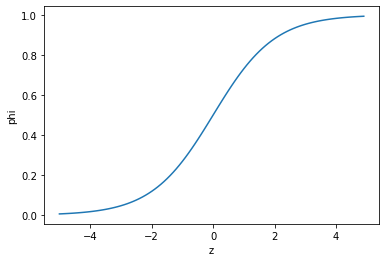

In [18]:

z = np.arange(-5, 5, 0.1) # -5 ~ 5 까지 값을 0.1단위로 생성
z

phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [42]:
'sex_FEMALE','sex_MALE'
sex_indexes = (train_target == 'MALE') | (train_target == 'FEMALE')

train_sex = train_scaled[sex_indexes] 

# 도미와 빙어만 테스트 데이터로 생성
target_sex = train_target[sex_indexes] 

C:\Users\CDL\AppData\Local\Temp\ipykernel_11040\2118946105.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  sex_indexes = (train_target == 'MALE') | (train_target == 'FEMALE')


In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_sex,target_sex)

# 예측하기
print(lr.predict(train_body[:5]))

# 퍼센트 확인
print(lr.predict_proba(train_body[:5]))

# 분류 클래스 확인
print(lr.classes_)

# 회귀 계수 확인
print(lr.coef_, lr.intercept_)

ValueError: Found array with dim 3. Estimator expected <= 2.